In [54]:
import pandas as pd
import numpy as np

In [55]:
from sklearn import tree

In [56]:
%matplotlib inline
import seaborn as sns

In [57]:
train_data = pd.read_csv('train_iris.csv', index_col=0)
test_data = pd.read_csv('test_iris.csv', index_col=0)

In [58]:
X_train = train_data.drop(['species'], axis=1)
y_train = train_data.species

X_test = test_data.drop(['species'], axis=1)
y_test = test_data.species

In [59]:
depth_values = range(1, 100)

In [60]:
results = []

In [61]:
np.random.seed(0)
for depth in depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    results.append([depth, train_score, test_score])

In [62]:
scores = pd.DataFrame(results, columns=['depth', 'train_score', 'test_score'])

In [63]:
scores_long = pd.melt(
    scores,
    id_vars=['depth'],
    value_vars=['train_score', 'test_score'],
    var_name='score_type',
    value_name='score'
)

<AxesSubplot:xlabel='depth', ylabel='score'>

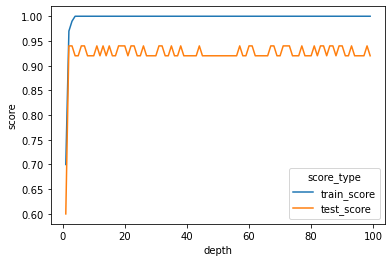

In [64]:
sns.lineplot(data=scores_long, x='depth', y='score', hue='score_type')